<a href="https://colab.research.google.com/github/Jin0331/TA/blob/master/DS_Lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **11주차 실습 - 단순 회귀 분석(Regression Analysis)**

- - -

```
1. 상관분석 : 변수들이 서로 얼마나 밀접하게 직선적인 관계를 가지고 있는지를 분석하는 통계적 기법

2. 회귀분석 : 한 개 또는 그 이상의 변수들(설명변수 또는 독립변수)에 대하여 다른 한 변수(반응변수 또는 종속변수) 사이의 관계를 수학적인 모형을 이용하여 설명하고 예측하는 분석 기법

쉽게 말하자면, 상관분석에서는 산점도의 점들의 분포를 통해 일정한 패턴을 확인한 후, 상관계수를 구하여 두 변수 간의 선형관계를 알 수 있었다. 
더 나아가 이 일정한 패턴을 활용하여 무엇인가를 예측하는 분석을 회귀분석이라고 보면 된다.

출처 : https://ordo.tistory.com/23
```





### **<단순선형회귀분석>**

<img src="https://t1.daumcdn.net/cfile/tistory/231B994658BE0C5520" width="600" height="100">

* 회귀식의 추정

두 변수 X와 Y의 관계에 적합한 회귀식을 구하기 위해서는 관측된 값으로부터 회귀계수 B0와 B1의 값을 추정하여야 함.!

* Fitting Linear Models : lm

```
lm(formula = [Y ~ X + ... ], data = [ ] )
formula : 반응변수(Y) ~ 설명변수(X1 + X2 + ...) 의 형태로 지정한 식
data : 변수가 포함된 데이터 프레임
```

#### **A. 예제**

---


In [ ]:
install.packages(c("tidyverse", "data.table"))
library(tidyverse)
library(data.table)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [ ]:
DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Regular_Season_Batter.csv") %>% as_tibble()

# A tibble: 2,454 x 29
   batter_id batter_name  year team    avg     G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <dbl> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.339    50   183    27    62     9     0
 2         1 강경학       2011 한화  0         2     1     0     0     0     0
 3         1 강경학       2014 한화  0.221    41    86    11    19     2     3
 4         1 강경학       2015 한화  0.257   120   311    50    80     7     4
 5         1 강경학       2016 한화  0.158    46   101    16    16     3     2
 6         1 강경학       2017 한화  0.214    59    84    17    18     2     1
 7         1 강경학       2018 한화  0.278    77   245    42    68    11     1
 8         2 강구성       2013 NC    0         2     2     0     0     0     0
 9         2 강구성       2015 NC    0.2       4     5     0     1     1     0
10         2 강구성       2016 NC    0         2     3     0     0     0     0
# … with 2,444 more rows, and 18 more variables: HR <int>, TB <int>, RBI

* **Scatter Plot(산점도)**

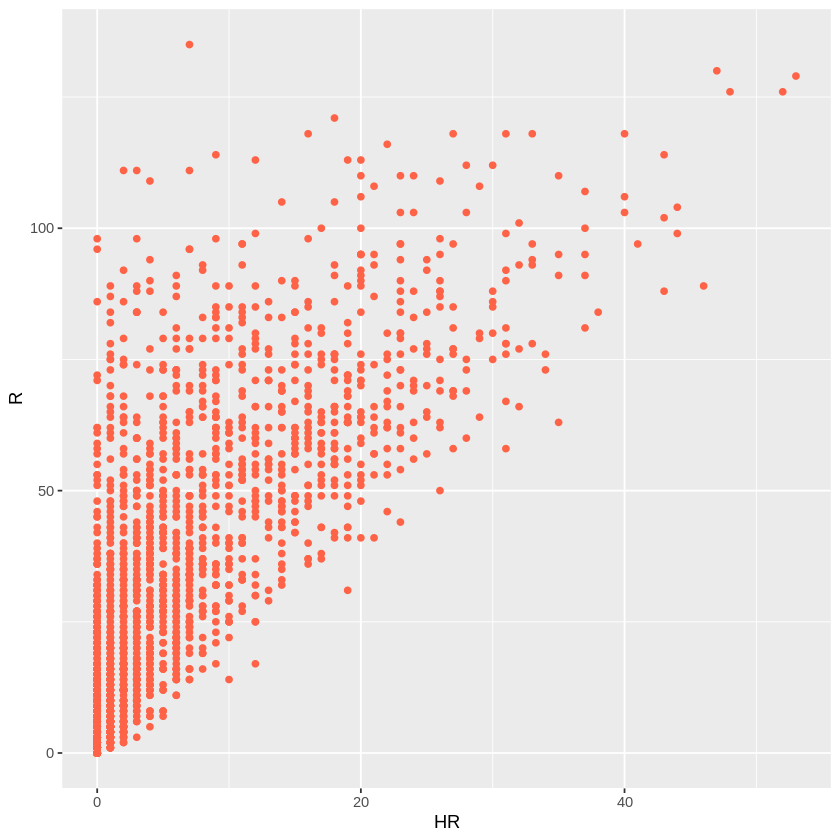

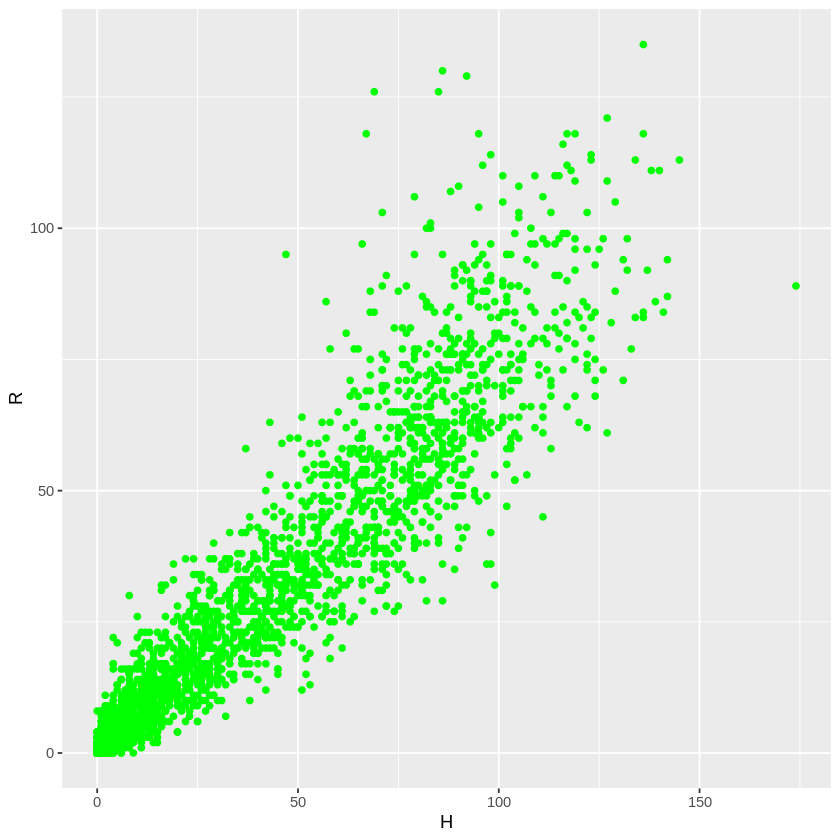

In [ ]:
# H = 1루타+2루타+3루타+홈런
DF <- DF %>% mutate(H = H - `2B` - `3B` - HR)

# R(득점)과 HR(홈런) 
DF %>% ggplot(aes(x = HR, y = R)) + 
 geom_point(color = "tomato")

 # R(득점)과 H(안타))
DF %>% ggplot(aes(x = H, y = R)) + 
 geom_point(color = "green")

In [ ]:
m1 <- lm(formula = R ~ HR, data = DF)
m2 <- lm(formula = R ~ H, data = DF)

m1
m2


Call:
lm(formula = R ~ HR, data = DF)

Coefficients:
(Intercept)           HR  
     14.661        2.771  



Call:
lm(formula = R ~ H, data = DF)

Coefficients:
(Intercept)            H  
     0.8844       0.7319  


* m1에서 ``b0 = 14.661, b1 = 2.771 으로부터 R = 14.661 + 2.771 * HR`` 라는 회귀식 도출

* m2에서 ``b0 = 0.8844, b1 = 0.7319 으로부터 R = 0.8844 + 0.7319 * H``라는 회귀식 도출


* HR(홈런)이 1 증가할 때마다 R(득점)이 2.771만큼 증가
* H(안타)가 1 증가할 때마다 R(득점)이 0.7319만큼 증가

* **회귀선**

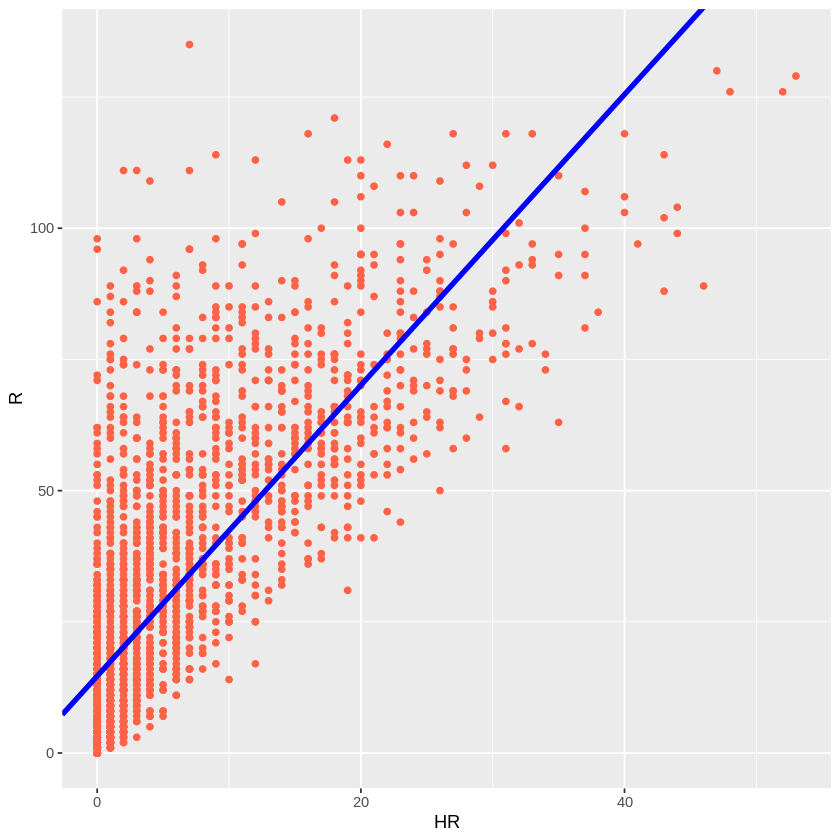

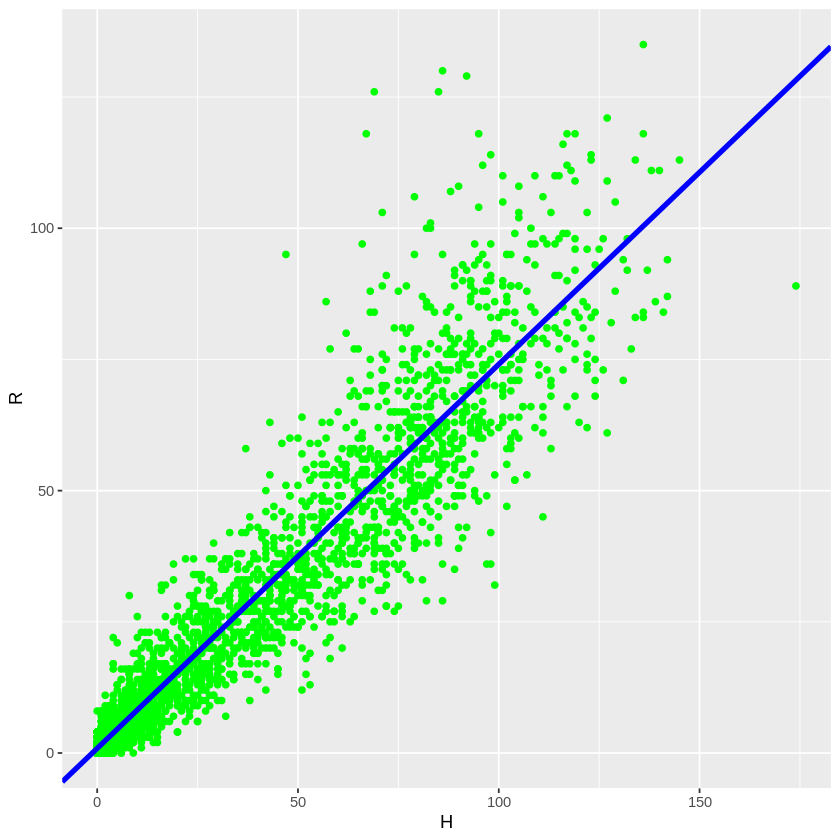

In [ ]:
# ggplot2
ggplot(DF, aes(x = HR, y = R)) + 
 geom_point(color = "tomato") +
 geom_abline(intercept = coef(m1)[1], slope = coef(m1)[2], color = "blue", size = 1.5)

 ggplot(DF, aes(x = H, y = R)) + 
  geom_point(color = "green") +
  geom_abline(intercept = coef(m2)[1], slope = coef(m2)[2], color = "blue", size = 1.5)

* **회귀모형의 검정 및 적합도 파악**


    (1) 결과의 해석
        https://freshrimpsushi.tistory.com/652
    (2) R 제곱과 수정된 R 제곱의 차이
        https://chukycheese.github.io/statistics/adjusted-r2/


```
1. F-statistic
도출된 회귀식이 회귀분석 모델 전체에 대해 통계적으로 의미가 있는지 파악

2. P-Value
각 설명변수가 반응변수에 미치는 영향이 유의한지 파악

3. 수정된 R제곱
회귀직선에 의하여 설명되는 변동이 총변동 중에서 차지하고 있는 상대적인 비율이 얼마인지 나타냄. 즉, 회귀직선이 종속변수의 몇%를 설명할 수 있는지 확인
```

In [ ]:
summary(m1)


Call:
lm(formula = R ~ HR, data = DF)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.121 -12.974  -5.953   8.568 100.943 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.66141    0.45090   32.52   <2e-16 ***
HR           2.77085    0.04648   59.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.39 on 2452 degrees of freedom
Multiple R-squared:  0.5917,	Adjusted R-squared:  0.5915 
F-statistic:  3554 on 1 and 2452 DF,  p-value: < 2.2e-16


In [ ]:
summary(m2)


Call:
lm(formula = R ~ H, data = DF)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.339  -4.501  -0.884   3.439  74.617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.884383   0.309431   2.858   0.0043 ** 
H           0.731866   0.005729 127.740   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.4 on 2452 degrees of freedom
Multiple R-squared:  0.8694,	Adjusted R-squared:  0.8693 
F-statistic: 1.632e+04 on 1 and 2452 DF,  p-value: < 2.2e-16


```
<결과의 해석>
** m1 모델 **
1. 제일 밑에 F-statistic의 p-value 값은 2.2e-16 로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다.

2. 중간의 Coefficients:에는 y절편 값(Intercept) 및 변수들의 p-value 값이 나와있다. 
HR 변수의 경우 2e-16으로 0.05보다 작기에 R을 설명하는데 유의하다고 판단할 수 있다.

3. 밑 부분의 Adjusted R-squared 값은 0.5915로, 59%만큼의 설명력을 가진다고 판단할 수 있다.
(0에 가까울 수록 예측값 믿을 수 없고 1에 가까울 수록 믿을 수 있다)

** m2 모델 **
1. 제일 밑에 F-statistic의 p-value 값은 2.2e-16 로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다.

2. 중간의 Coefficients:에는 y절편 값(Intercept) 및 변수들의 p-value 값이 나와있다. 
H 변수의 경우 2e-16으로 0.05보다 작기에 R 설명하는데 유의하다고 판단할 수 있다.

3. 밑 부분의 Adjusted R-squared 값은 0.8693로, 86%만큼의 설명력을 가진다고 판단할 수 있다.
```

* **예측**

In [ ]:
set.seed(31)

rand <- sample(1:40, 10, replace = F) 

random_m1 <- tibble(HR = rand) # sample을 이용한 난수 생성
random_m2 <- tibble(H = rand) 

random_m1 %>% show()

# A tibble: 10 x 1
      HR
   <int>
 1    11
 2    26
 3    27
 4     9
 5    40
 6    33
 7    29
 8    20
 9     2
10    17


In [ ]:
result_DF <- bind_cols(tibble(value = rand),
 tibble(HR_predict = predict(m1, random_m1)), 
 tibble(H_predict = predict(m2, random_m2)))
result_DF %>% show()

# A tibble: 10 x 3
   value HR_predict H_predict
   <int>      <dbl>     <dbl>
 1    11       45.1      8.93
 2    26       86.7     19.9 
 3    27       89.5     20.6 
 4     9       39.6      7.47
 5    40      125.      30.2 
 6    33      106.      25.0 
 7    29       95.0     22.1 
 8    20       70.1     15.5 
 9     2       20.2      2.35
10    17       61.8     13.3 


* 시각화

Warning message:
“Removed 2 rows containing missing values (geom_point).”


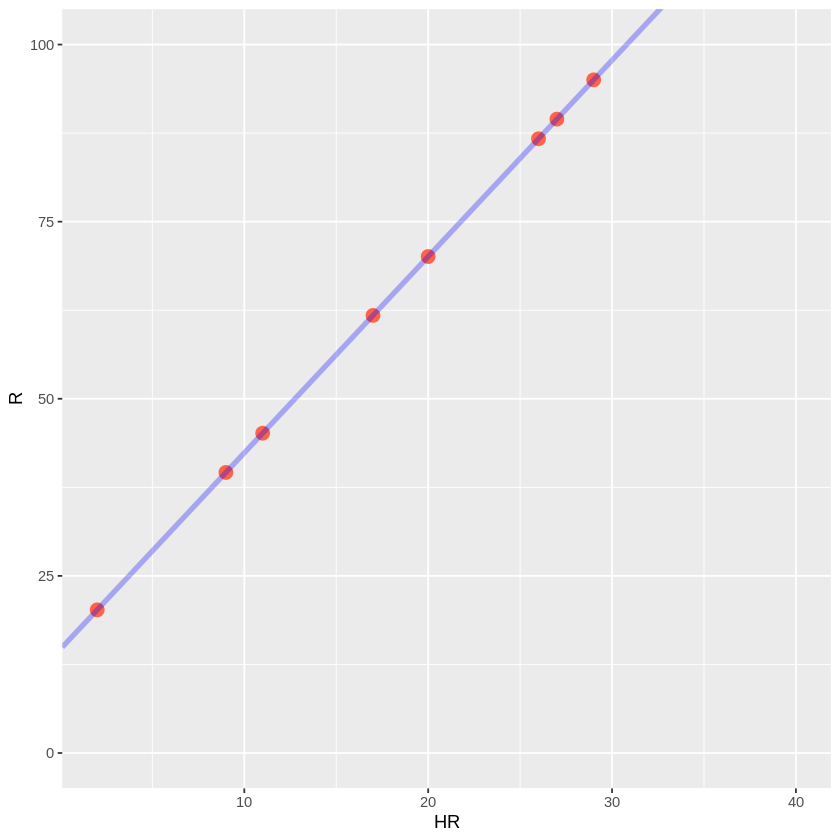

In [ ]:
ggplot(DF, aes(x = HR, y = R)) + 
 geom_point(data = result_DF, aes(x = value, y = HR_predict), color = "tomato",size = 3.5) +
 geom_abline(intercept = coef(m1)[1], slope = coef(m1)[2], color = "blue", size = 1.5, alpha = 0.3) +
 scale_y_continuous(limits = c(0, 100))

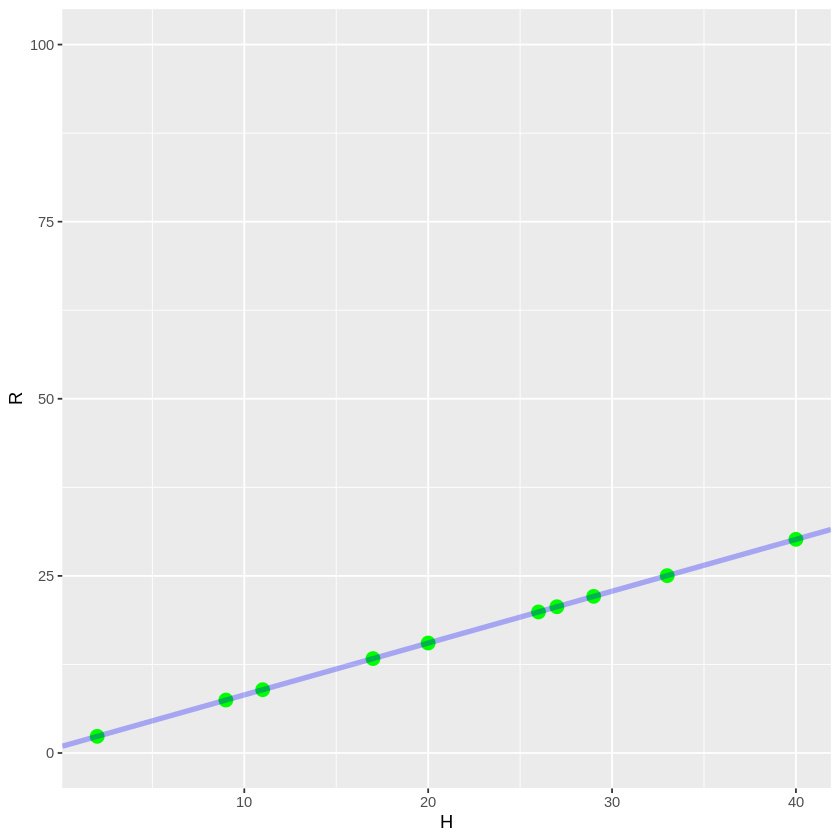

In [ ]:
ggplot(DF, aes(x = H, y = R)) + 
 geom_point(data = result_DF, aes(x = value, y = H_predict), color = "green", size = 3.5) +
 geom_abline(intercept = coef(m2)[1], slope = coef(m2)[2], color = "blue", size = 1.5, alpha = 0.3) +
 scale_y_continuous(limits = c(0, 100))